# Clustering  --- using a combination of covid cases and hospital beds per neighborhood
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [48]:
#import libraries
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

import folium  ## map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import DBSCAN
from sklearn.cluster import DBSCAN

import plotly.graph_objects as go

from sklearn import metrics

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#load dataset
NYC_covid = pd.read_csv('NYC_covid.csv')

#check data
NYC_covid.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0


In [3]:
#load bed per 1000 people dataset
NYC_beds = pd.read_csv('hospital_cleaned_df.csv')

#check data
NYC_beds.head()

,Neighborhood,Borough,longitude,latitude,Population,ZIP Codes,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people"
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,"10466, 10470",0.0,0.0,0.0,0.0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,0.0,0.0,0.0,0.0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,0.0,0.0,0.0,0.0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,"10463, 10471",0.0,0.0,0.0,0.0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,0.0,0.0,0.0,0.0


In [8]:
#merge both dataset on Neighborhood, Borough, longitude, latitude, Population

NYC = NYC_covid.merge(NYC_beds, how = 'inner', left_on=['Neighbourhood', 'borough', 'longitude', 'latitude', 'Population'],
                      right_on = ['Neighborhood', 'Borough', 'longitude', 'latitude', 'Population'])

#check
NYC.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Neighborhood,Borough,ZIP Codes,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people"
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0,Wakefield,Bronx,"10466, 10470",0.0,0.0,0.0,0.0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0,Co-op City,Bronx,10475,0.0,0.0,0.0,0.0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0,Fieldston,Bronx,10471,0.0,0.0,0.0,0.0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0,Riverdale,Bronx,"10463, 10471",0.0,0.0,0.0,0.0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0,Kingsbridge,Bronx,10463,0.0,0.0,0.0,0.0


In [9]:
#drop Neighborhood, Borough, ZIP Codes
NYC.drop(['Neighborhood', 'Borough', 'ZIP Codes'], axis = 1, inplace=True)

#check
NYC.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people"
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0,0.0,0.0,0.0,0.0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0,0.0,0.0,0.0,0.0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0,0.0,0.0,0.0,0.0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0,0.0,0.0,0.0,0.0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0,0.0,0.0,0.0,0.0


In [10]:
#drop Neighborhood, Borough, longitude, latitude, Population, ZIP_CODE, MODZCTA, COVID_CONFIRMED_CASE_RATE, COVID_CONFIRMED_DEATH_RATE columns
NYC_clustering_df = NYC.drop(['Neighbourhood', 'borough', 'longitude', 'latitude', 'Population', 
                        'ZIP_CODE', 'MODZCTA', 'COVID_CONFIRMED_CASE_RATE', 'COVID_CONFIRMED_DEATH_RATE', 'TOTAL_COVID_TESTS',
                        'Total Staffed ICU Beds', 'Total Staffed Beds'], axis=1)

#check
NYC_clustering_df.head()

,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,"Beds per 1,000 people","ICU Beds per 1,000 people"
0,6210.0,113.0,0.0,0.0
1,8654.0,292.0,0.0,0.0
2,706.0,21.0,0.0,0.0
3,10141.0,244.0,0.0,0.0
4,2251.0,54.0,0.0,0.0


In [11]:
#standardize using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(NYC_clustering_df)

In [55]:
###Elbow Rule --Used to determine k - number of clusters -- aim for small inertia/distortion

#define function to calculate the distortion(inertia) for multiple k values and plot the results
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
        

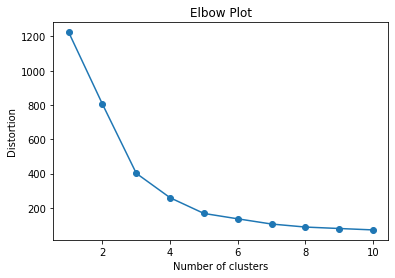

In [56]:
# elbow rule
X = scaled_data
plot_distortion(X,max_clusters=10)

In [14]:
##K-Means Clustering

km = KMeans(n_clusters=3, # how many clusters from elbow rule
            n_init=10, # how many initial runs
            random_state=0) #For reproducibility

In [15]:
## fit and predict 

y_km = km.fit_predict(X)

In [16]:
#make a deep copy of the NYC dataframe
NYC_kmeans = NYC.copy()

#get the cluster each neighborhood belongs to
NYC_kmeans['cluster'] = y_km

#check dataframe
NYC_kmeans.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0,0.0,0.0,0.0,0.0,1
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0,0.0,0.0,0.0,0.0,1
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0,0.0,0.0,0.0,0.0,1
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0,0.0,0.0,0.0,0.0,1
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0,0.0,0.0,0.0,0.0,1


In [169]:
#check neighborhoods in cluster 0
NYC_kmeans[NYC_kmeans['cluster'] == 0]

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
8,Baychester,Bronx,-73.835798,40.866858,63345.0,10469,10469,21364.15,706.45,66872,13533.0,447.0,0.0,0.0,0.000000,0.000000,0
33,Bay Ridge,Brooklyn,-74.030621,40.625801,79371.0,11209,11209,23217.26,361.40,64926,18427.0,286.0,0.0,0.0,0.000000,0.000000,0
34,Bensonhurst,Brooklyn,-73.995180,40.611009,104934.0,11204,11204,22076.22,371.01,76567,23165.0,389.0,0.0,0.0,0.000000,0.000000,0
35,Sunset Park,Brooklyn,-74.010316,40.645103,126000.0,11220,11220,25480.29,353.10,93606,32105.0,444.0,42.0,279.0,2.214286,0.333333,0
39,Flatbush,Brooklyn,-73.958401,40.636326,105804.0,11226,11226,21553.06,487.90,95017,22803.0,516.0,0.0,0.0,0.000000,0.000000,0
40,Crown Heights,Brooklyn,-73.943291,40.670829,143000.0,11213,11213,23778.17,450.46,69425,34002.0,644.0,23.0,236.0,1.650350,0.160839,0
41,East Flatbush,Brooklyn,-73.936103,40.641718,135619.0,11203,11203,21773.36,521.04,69622,29528.0,706.0,0.0,0.0,0.000000,0.000000,0
44,Brownsville,Brooklyn,-73.910235,40.663950,58300.0,11212,11212,27450.08,593.51,80142,16003.0,346.0,71.0,411.0,7.049743,1.217839,0
45,Williamsburg,Brooklyn,-73.958115,40.707144,151308.0,11206,11206,24075.67,350.59,92227,36428.0,530.0,0.0,0.0,0.000000,0.000000,0
46,Bushwick,Brooklyn,-73.925258,40.698116,129239.0,11206,11206,24075.67,350.59,92227,31115.0,453.0,24.0,223.0,1.725485,0.185702,0


In [19]:
#check neighborhoods in cluster 2
NYC_kmeans[NYC_kmeans['cluster'] == 2]

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
75,Murray Hill,Manhattan,-73.978332,40.748303,10864.0,10016,10016,23837.16,153.21,70116,2589.0,16.0,291.0,2231.0,205.357143,26.785714,2
129,South Beach,Staten Island,-74.079553,40.580247,8575.0,10305,10305,29916.33,410.68,41028,2565.0,35.0,116.0,666.0,77.667638,13.527697,2


In [151]:
#define a function to visualize neighborhood cluster on map

def neighborhood_cluster_viz(num_clusters, df, colours):
    '''This function takes an input of the num of clusters with maximum of 5 clusters, 
    a dataframe and a list of colours based on cluster interpretation and outputs a map of the neighbourhood with each circle 
    representing a neighbourhood and the colour representing the cluster the neighbourhood belongs to'''
   
    #get latitude, longitude of New York city
    latitude = 40.7127281
    longitude  = -74.0060152

    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

    # set color scheme for the clusters
    num_clusters = num_clusters
    colours = colours
    #colours = ['red', 'green','yellow' , 'purple', 'pink']

    # add neighborhood cluster markers to the map
    markers_colors = []
    for lat, lon, bor, nei, cluster, case_count, death_count, beds, ICU in zip(
        df['latitude'], df['longitude'], df['borough'], df['Neighbourhood'], 
        df['cluster'],df['COVID_CONFIRMED_CASE_COUNT'], df['COVID_CONFIRMED_DEATH_COUNT'], 
        df['Beds per 1,000 people'], df['ICU Beds per 1,000 people']):

            label = folium.Popup(('Cluster' + " " + str(cluster)+': ' + str(bor) + "-" + str(nei) + " " + str(case_count) +
                                  " " + "cases" + " " + str(death_count) + " " + "deaths" + " " + str(round(beds, 2)) + " " + 
                                  "Beds per 1,000 people" + " " + str(round(ICU, 2)) + " " + "ICU Beds per 1,000 people"
                                 ), parse_html=True)
            folium.CircleMarker([lat, lon],
                radius=3,
                popup=label,
                color=colours[cluster],
                fill=True,
                fill_color='none',
                line_opacity = 0.7,
                fill_opacity=0.7).add_to(map_clusters)
    return map_clusters

## visualize NYC neighborhoods clustered by covid cases, death count, beds per 1000 people and ICU beds per 1000 people using kmeans

In [167]:
neighborhood_cluster_viz(num_clusters = 3, df = NYC_kmeans, colours = ['black','red', 'green'])

### use hierachical clustering


In [27]:
#define a function to plot dendogram
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

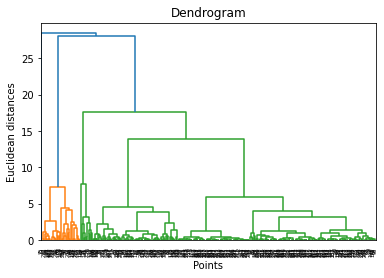

In [28]:
#plot dendogram

plot_dendrogram(X)

In [29]:
##From dendrogram, optimal number of clusters = 3

#create an object from the AgglomerativeClustering class

ac = AgglomerativeClustering(affinity='euclidean',  #set the Euclidean distance to the affinity parameter
                             linkage='ward',  #linkage determines the metric used for the merge strategy
                             n_clusters = 3)  #number of clusters

# fit and predict
y_hc = ac.fit_predict(X)

In [30]:
#Define function to plot the clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

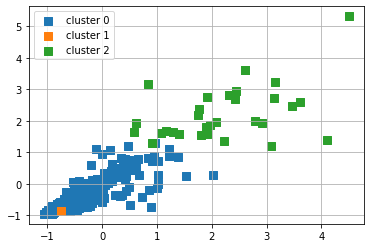

In [31]:
# Plot clustering result
plot_clusters(X,y_hc)

In [33]:
#visualize neighborhood clusters from hierachical clustering in map
#make a deep copy of the NYC_covid dataframe
NYC_hierarchical = NYC.copy()

#get the cluster each neighborhood belongs to
NYC_hierarchical['cluster'] = y_hc

#check dataframe
NYC_hierarchical.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0,0.0,0.0,0.0,0.0,0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0,0.0,0.0,0.0,0.0,0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0,0.0,0.0,0.0,0.0,0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0,0.0,0.0,0.0,0.0,0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0,0.0,0.0,0.0,0.0,0


In [35]:
#Check neighborhoods in cluster 1
NYC_hierarchical[NYC_hierarchical['cluster'] == 1]

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
75,Murray Hill,Manhattan,-73.978332,40.748303,10864.0,10016,10016,23837.16,153.21,70116,2589.0,16.0,291.0,2231.0,205.357143,26.785714,1


In [36]:
#Check neighborhoods in cluster 2
NYC_hierarchical[NYC_hierarchical['cluster'] == 2]

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
8,Baychester,Bronx,-73.835798,40.866858,63345.0,10469,10469,21364.15,706.45,66872,13533.0,447.0,0.0,0.0,0.000000,0.000000,2
34,Bensonhurst,Brooklyn,-73.995180,40.611009,104934.0,11204,11204,22076.22,371.01,76567,23165.0,389.0,0.0,0.0,0.000000,0.000000,2
35,Sunset Park,Brooklyn,-74.010316,40.645103,126000.0,11220,11220,25480.29,353.10,93606,32105.0,444.0,42.0,279.0,2.214286,0.333333,2
39,Flatbush,Brooklyn,-73.958401,40.636326,105804.0,11226,11226,21553.06,487.90,95017,22803.0,516.0,0.0,0.0,0.000000,0.000000,2
40,Crown Heights,Brooklyn,-73.943291,40.670829,143000.0,11213,11213,23778.17,450.46,69425,34002.0,644.0,23.0,236.0,1.650350,0.160839,2
41,East Flatbush,Brooklyn,-73.936103,40.641718,135619.0,11203,11203,21773.36,521.04,69622,29528.0,706.0,0.0,0.0,0.000000,0.000000,2
44,Brownsville,Brooklyn,-73.910235,40.663950,58300.0,11212,11212,27450.08,593.51,80142,16003.0,346.0,71.0,411.0,7.049743,1.217839,2
45,Williamsburg,Brooklyn,-73.958115,40.707144,151308.0,11206,11206,24075.67,350.59,92227,36428.0,530.0,0.0,0.0,0.000000,0.000000,2
46,Bushwick,Brooklyn,-73.925258,40.698116,129239.0,11206,11206,24075.67,350.59,92227,31115.0,453.0,24.0,223.0,1.725485,0.185702,2
51,Canarsie,Brooklyn,-73.902093,40.635564,83693.0,11236,11236,21427.72,487.04,85941,17933.0,407.0,0.0,0.0,0.000000,0.000000,2


## visualize neighborhood clustering by hierarchical clustering method

In [153]:
neighborhood_cluster_viz(num_clusters = 3, df = NYC_hierarchical, colours=['yellow', 'green', 'red'])

### use DBScan

In [155]:
#define params space with eps and min_sample
eps = [0.2, 0.4, 0.5, 0.6, 0.8]
min_samples = [3, 4, 5]

In [23]:
# #combine different values of the parameters and visualize the clusters
# import itertools

# for element in itertools.product(eps, min_samples):
#     db = DBSCAN(eps=element[0],
#                 min_samples=element[1],
#                 metric='euclidean')
#     y_db = db.fit_predict(X)
#     plt.title(f'eps = {element[0]},  min_samples = {element[1]}')
#     plot_clusters(X,y_db)

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on covid cases and covid death features
- clustering only on hospital beds features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

## How are neighborhoods split when we select only 2 clusters?

In [40]:
##K-Means Clustering

km1 = KMeans(n_clusters=2, # check neighbourhood split with only 2 clusters
            n_init=10, # how many initial runs
            random_state=0) #For reproducibility

## fit and predict 
X = scaled_data

y_km1 = km1.fit_predict(X)

In [41]:
#make a deep copy of the NYC_covid dataframe
NYC_2clusters = NYC.copy()

#get the cluster each neighborhood belongs to
NYC_2clusters['cluster'] = y_km1

#check dataframe
NYC_2clusters.head()

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
0,Wakefield,Bronx,-73.847201,40.894705,29158.0,10466,10466,21299.93,388.44,65398,6210.0,113.0,0.0,0.0,0.0,0.0,0
1,Co-op City,Bronx,-73.829939,40.874294,43752.0,10475,10475,19781.32,669.20,37537,8654.0,292.0,0.0,0.0,0.0,0.0,0
2,Fieldston,Bronx,-73.905643,40.895437,3292.0,10471,10471,21453.73,640.27,23352,706.0,21.0,0.0,0.0,0.0,0.0,0
3,Riverdale,Bronx,-73.912585,40.890834,48049.0,10463,10463,21106.29,508.69,66378,10141.0,244.0,0.0,0.0,0.0,0.0,0
4,Kingsbridge,Bronx,-73.902818,40.881687,10669.0,10463,10463,21106.29,508.69,66378,2251.0,54.0,0.0,0.0,0.0,0.0,0


In [42]:
#check cluster 1
NYC_2clusters[NYC_2clusters['cluster']==1]

,Neighbourhood,borough,longitude,latitude,Population,ZIP_CODE,MODZCTA,COVID_CONFIRMED_CASE_RATE,COVID_CONFIRMED_DEATH_RATE,TOTAL_COVID_TESTS,COVID_CONFIRMED_CASE_COUNT,COVID_CONFIRMED_DEATH_COUNT,Total Staffed ICU Beds,Total Staffed Beds,"Beds per 1,000 people","ICU Beds per 1,000 people",cluster
75,Murray Hill,Manhattan,-73.978332,40.748303,10864.0,10016,10016,23837.16,153.21,70116,2589.0,16.0,291.0,2231.0,205.357143,26.785714,1
129,South Beach,Staten Island,-74.079553,40.580247,8575.0,10305,10305,29916.33,410.68,41028,2565.0,35.0,116.0,666.0,77.667638,13.527697,1


In [154]:
#visualize neighbourhood clusters
neighborhood_cluster_viz(num_clusters = 2, df = NYC_2clusters, colours=['red', 'green'])

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.

In [24]:
##evaluate kmeans segmentation using silhoutte score
labels = km.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.634767349363504

In [45]:
##evaluate kmeans segmentation for 2 clusters using silhoutte score
labels = km1.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.8808973269663872

In [39]:
##evaluate hierarchical segmentation using silhoutte score
labels = ac.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6495672704033141

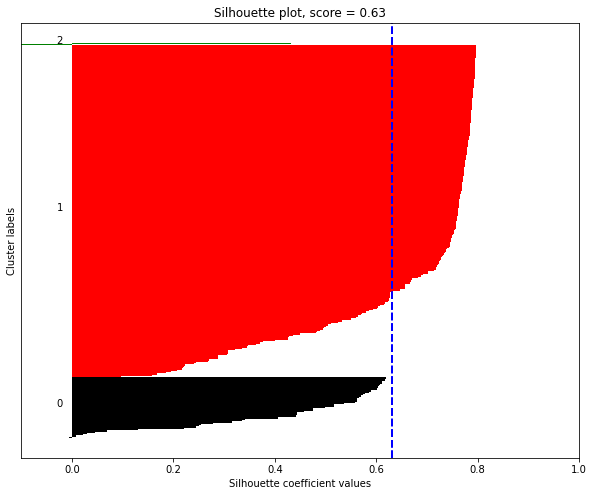

In [166]:
centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(X,y_km)
    #silhouette_vals
# silhouette plot

y_lower = 0
y_upper = 0

color = [ 'black','red', 'green']
plt.figure(figsize=(10,8))
for i,cluster in enumerate(np.unique(y_km)):
    cluster_silhouette_vals = silhouette_vals[y_km ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    
    
    plt.barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1, color = color[i])
    plt.text(-0.03,(y_lower+y_upper)/2,str(i))
    y_lower += len(cluster_silhouette_vals)
       
    # Get the average silhouette score 
    avg_score = round(np.mean(silhouette_vals), 2)
    plt.axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'blue')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title(f'Silhouette plot, score = {avg_score}')